In [52]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [53]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [54]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

In [55]:
# checking I'm able to read environmet variables
type(PLAID_CLIENT_ID)

str

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [56]:
INSTITUTION_ID = "ins_109508"

In [57]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

### 2. Generate a public token

In [58]:
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [59]:
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

### 4. Fetch Accounts

In [60]:
access_token = exchange_response['access_token']

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [61]:
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now()) 
transactions_response = client.Transactions.get(access_token, start_date, end_date)

### 2. Print the categories for each transaction

In [62]:
for transactions in transactions_response['transactions']:
    print(transactions['category'])  

['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi'

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [63]:
# A dataframe can be defined as a list of lists:
transactions_lst = []
for transactions in transactions_response['transactions']:
    transactions_date = transactions['date']
    transactions_name = transactions['name']
    transactions_amount = transactions['amount']
    transactions_category = transactions['category']
    transactions_lst.append([transactions_date,transactions_name,transactions_amount,transactions_category[0]])     

In [68]:
# Once we have our list of lists we just use DataFrame panda method
transactions_df = pd.DataFrame(transactions_lst)
transactions_df.columns =['Date','Name','Amount','Category']
transactions_df.head()

,Date,Name,Amount,Category
0,2020-04-24,AUTOMATIC PAYMENT - THANK,2078.5,Payment
1,2020-04-24,KFC,500.0,Food and Drink
2,2020-04-24,Madison Bicycle Shop,500.0,Shops
3,2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.0,Payment
4,2020-04-15,Uber,5.4,Travel


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [18]:
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now()) 
transactions_response = client.Transactions.get(access_token, start_date, end_date)

In [69]:
transactions_df['Amount'] = transactions_df['Amount'].astype(float)
transactions_df.set_index('Date', inplace = True)
transactions_df.head()

,Name,Amount,Category
Date,,,
2020-04-24,AUTOMATIC PAYMENT - THANK,2078.5,Payment
2020-04-24,KFC,500.0,Food and Drink
2020-04-24,Madison Bicycle Shop,500.0,Shops
2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.0,Payment
2020-04-15,Uber,5.4,Travel


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [22]:
# We need to fetch the income data from the sandbox
income_response = client.Income.get(access_token)
income_response

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 720,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': '2ye0cqFDbcNnyf6'}

#### Previous year's gross income

In [70]:
last_year_incomeBT =income_response['income']['last_year_income_before_tax']
print (f"Last year's income before tax was: ${last_year_incomeBT}")

Last year's income before tax was: $7285


#### Current Monthly Income

In [49]:
# we just query the 'income' dictionary with the info
income_streams =income_response['income']['income_streams']
print (f"Current monthly income is: ${income_streams[0]['monthly_income']}")

Current monthly income is: $500


#### Projected Year's Income Before Tax

In [51]:
# we just query the 'income' dictionary with the info
projected_year_incomeBT =income_response['income']['projected_yearly_income_before_tax']
print (f"Projected Year's Income Before Tax is: ${projected_year_incomeBT}")

Projected Year's Income Before Tax is: $7389


# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [338]:
transactions_df.groupby(['Category']).sum()

,Amount
Category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B08E011B00>],
      dtype=object)

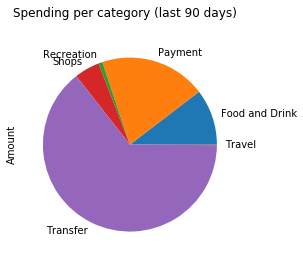

In [339]:
# Spending Categories Pie Chart
transactions_df.groupby(['Category']).sum().plot(subplots = True ,legend = False,kind = 'pie', title = 'Spending per category (last 90 days)')

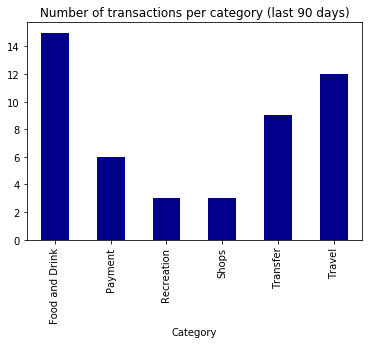

In [340]:
# bar chart with the number of transactions for each category
transactions_df.groupby(['Category']).count().plot(legend = False,kind = 'bar', color = 'DarkBlue', title = 'Number of transactions per category (last 90 days)')

### Calculate the expenses per month

In [341]:
# create a new column with only year and month from 'Date'
transactions_df.reset_index(inplace = True)
transactions_df['Date_Y_M']= transactions_df['Date'].str.slice(0, -3)
expenses_month_df = transactions_df.groupby(['Date_Y_M']).sum()
expenses_month_df

,Amount
Date_Y_M,
2020-01,4084.83
2020-02,10145.24
2020-03,11145.24
2020-04,6560.41


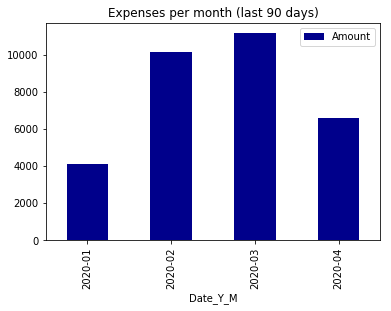

In [342]:
# plot expenses per month in a bar plot
expenses_month_df.plot(kind = 'bar', title = 'Expenses per month (last 90 days)', color = 'DarkBlue')

### Use the API to fetch income data from the sandbox and print the following:

#### Last Year's Income Before Tax

In [22]:
# We need to fetch the income data from the sandbox
income_response = client.Income.get(access_token)
income_response

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 720,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': '2ye0cqFDbcNnyf6'}

In [25]:
last_year_incomeBT =income_response['income']['last_year_income_before_tax']
print (f"Last year's income before tax was: ${last_year_incomeBT}")

Last year's income before tax was: $7285


#### Current Monthly Income

In [49]:
# we just query the 'income' dictionary with the info
income_streams =income_response['income']['income_streams']
print (f"Current monthly income is: ${income_streams[0]['monthly_income']}")

Current monthly income is: $500


#### Projected Year's Income Before Tax

In [51]:
# we just query the 'income' dictionary with the info
projected_year_incomeBT =income_response['income']['projected_yearly_income_before_tax']
print (f"Projected Year's Income Before Tax is: ${projected_year_incomeBT}")

Projected Year's Income Before Tax is: $7389
